<a href="https://colab.research.google.com/github/sonali6062/Predictive-Analytics-for-Diabetes-Diagnosis/blob/main/Cancer_data_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing necessary libraries for data manipulation, visualization, and analysis.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ignoring warnings to keep the output clean.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the dataset from a CSV file into a pandas DataFrame.
data = pd.read_csv("global_cancer_patients_2015_2024.csv")

In [3]:
# Displaying the entire DataFrame to get an overview of the data.
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [4]:
# Getting information about the DataFrame, including data types and non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

In [5]:
# Checking for duplicate rows in the DataFrame and summing the number of duplicates.
data.duplicated().sum()

np.int64(0)

#  Descriptive analysis

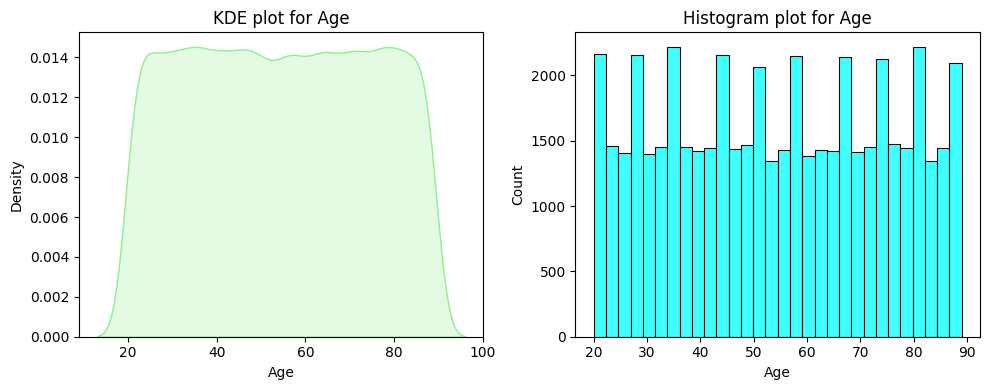

In [6]:
# Creating a figure with two subplots to visualize the distribution of the 'Age' column.
plt.figure(figsize=(10,4))

# Plotting a Kernel Density Estimate (KDE) plot for the 'Age' column.
plt.subplot(1,2,1)
sns.kdeplot(data["Age"], fill=True, color="lightgreen")
plt.title("KDE plot for Age")

# Plotting a histogram for the 'Age' column with 30 bins.
plt.subplot(1,2,2)
sns.histplot(data["Age"], bins=30,  kde=False, color="cyan")
plt.title("Histogram plot for Age")

# Adjusting layout to prevent overlapping titles and labels.
plt.tight_layout()
# Displaying the plots.
plt.show()

In [7]:
# Getting descriptive statistics for the 'Age' column.
data["Age"].describe()

,Age
count,50000.000000
mean,54.421540
std,20.224451
min,20.000000
25%,37.000000
50%,54.000000
75%,72.000000
max,89.000000


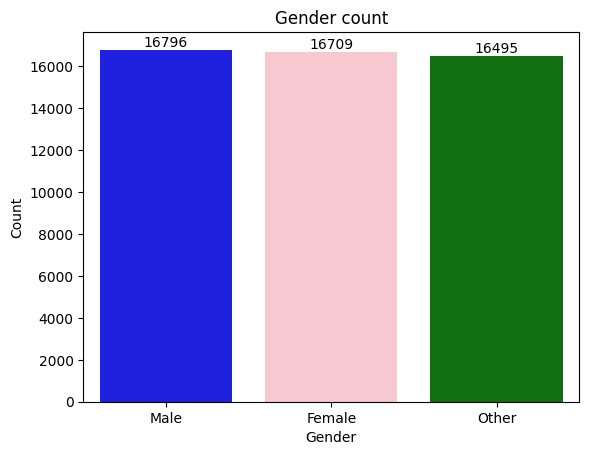

In [8]:
# Counting the occurrences of each unique value in the 'Gender' column.
data["Gender"].value_counts()

# Creating a bar plot to visualize the distribution of genders.
sns.barplot(x= data["Gender"].value_counts().index,
            y= data["Gender"].value_counts().values,
            palette=["blue", "pink", "green"]
           )
# Adding text labels on top of each bar showing the count.
for i , v in enumerate(data["Gender"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

# Setting the title and labels for the plot.
plt.title("Gender count")
plt.xlabel("Gender")
plt.ylabel("Count")
# Displaying the plot.
plt.show()

In [9]:
# Counting the occurrences of each unique value in the 'Gender' column.
data["Gender"].value_counts()

,count
Gender,
Male,16796
Female,16709
Other,16495


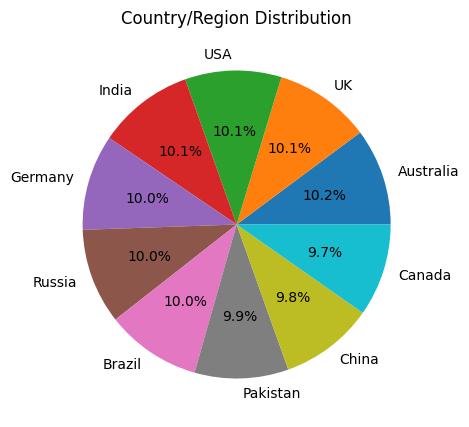

In [10]:
# Counting the occurrences of each unique value in the 'Country_Region' column.
country_counts= data["Country_Region"].value_counts()

# Creating a pie chart to visualize the distribution of patients across countries/regions.
plt.figure(figsize=(5,5))
plt.pie(x=country_counts.values,
        labels=country_counts.index,
        autopct= '%1.1f%%' # Displaying the percentage on each slice.
       )

# Setting the title for the pie chart.
plt.title("Country/Region Distribution")
# Displaying the plot.
plt.show()
#autopct--shows values

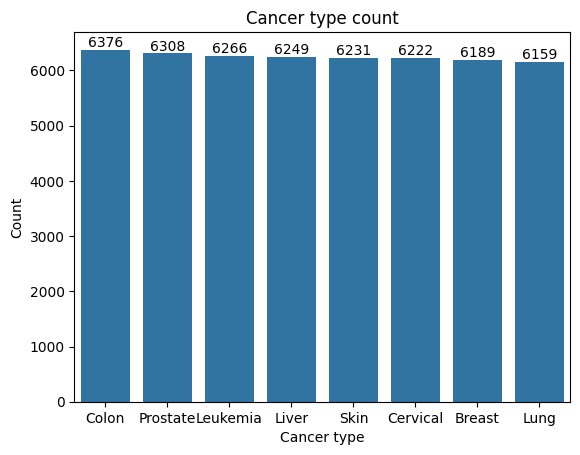

In [11]:
# Counting the occurrences of each unique value in the 'Cancer_Type' column.
data["Cancer_Type"].value_counts()

# Creating a bar plot to visualize the distribution of cancer types.
sns.barplot(x=data["Cancer_Type"].value_counts().index,
            y=data["Cancer_Type"].value_counts().values)

# Adding text labels on top of each bar showing the count.
for i , v  in enumerate(data["Cancer_Type"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

# Setting the title and labels for the plot.
plt.title("Cancer type count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
# Displaying the plot.
plt.show()

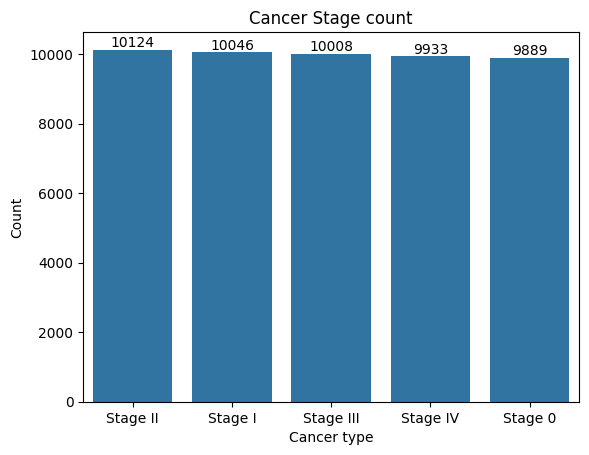

In [12]:
# Counting the occurrences of each unique value in the 'Cancer_Stage' column.
data["Cancer_Stage"].value_counts()

# Creating a bar plot to visualize the distribution of cancer stages.
sns.barplot(x=data["Cancer_Stage"].value_counts().index,
            y=data["Cancer_Stage"].value_counts().values)

# Adding text labels on top of each bar showing the count.
for i , v  in enumerate(data["Cancer_Stage"].value_counts()):
    plt.text(i,v, str(v), ha="center", va="bottom")

# Setting the title and labels for the plot.
plt.title("Cancer Stage count")
plt.xlabel("Cancer type")
plt.ylabel("Count")
# Displaying the plot.
plt.show()

In [13]:
# Getting information about the DataFrame, including data types and non-null counts.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             50000 non-null  object 
 1   Age                    50000 non-null  int64  
 2   Gender                 50000 non-null  object 
 3   Country_Region         50000 non-null  object 
 4   Year                   50000 non-null  int64  
 5   Genetic_Risk           50000 non-null  float64
 6   Air_Pollution          50000 non-null  float64
 7   Alcohol_Use            50000 non-null  float64
 8   Smoking                50000 non-null  float64
 9   Obesity_Level          50000 non-null  float64
 10  Cancer_Type            50000 non-null  object 
 11  Cancer_Stage           50000 non-null  object 
 12  Treatment_Cost_USD     50000 non-null  float64
 13  Survival_Years         50000 non-null  float64
 14  Target_Severity_Score  50000 non-null  float64
dtypes:

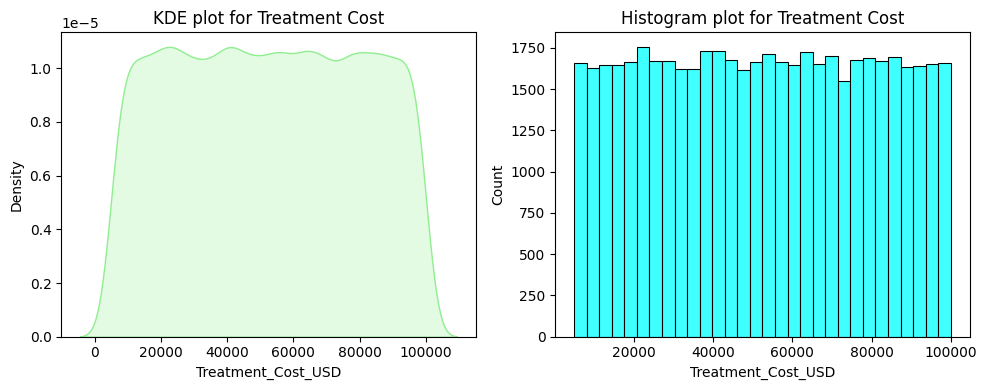

In [14]:
# Creating a figure with two subplots to visualize the distribution of 'Treatment_Cost_USD'.
plt.figure(figsize=(10,4))

# Plotting a Kernel Density Estimate (KDE) plot for the 'Treatment_Cost_USD' column.
plt.subplot(1,2,1)
sns.kdeplot(data["Treatment_Cost_USD"], fill=True, color="lightgreen")
plt.title("KDE plot for Treatment Cost")

# Plotting a histogram for the 'Treatment_Cost_USD' column with 30 bins.
plt.subplot(1,2,2)
sns.histplot(data["Treatment_Cost_USD"], bins=30,  kde=False, color="cyan")
plt.title("Histogram plot for Treatment Cost")

# Adjusting layout to prevent overlapping titles and labels.
plt.tight_layout()
# Displaying the plots.
plt.show()

In [15]:
# Getting descriptive statistics for the 'Treatment_Cost_USD' column.
data["Treatment_Cost_USD"].describe()

,Treatment_Cost_USD
count,50000.000000
mean,52467.298239
std,27363.229379
min,5000.050000
25%,28686.225000
50%,52474.310000
75%,76232.720000
max,99999.840000


In [16]:
# Defining the columns representing risk factors.
column_of_interest= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']

# Calculating mean, std, min, and max for the risk factor columns.
summary= data[column_of_interest].agg(['mean', "std", "min", "max"])
# Displaying the summary statistics.
summary

,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level
mean,5.001698,5.010126,5.010880,4.989826,4.991176
std,2.885773,2.888399,2.888769,2.881579,2.894504
min,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000


# Determine the relationship between risk factors and cancer severity

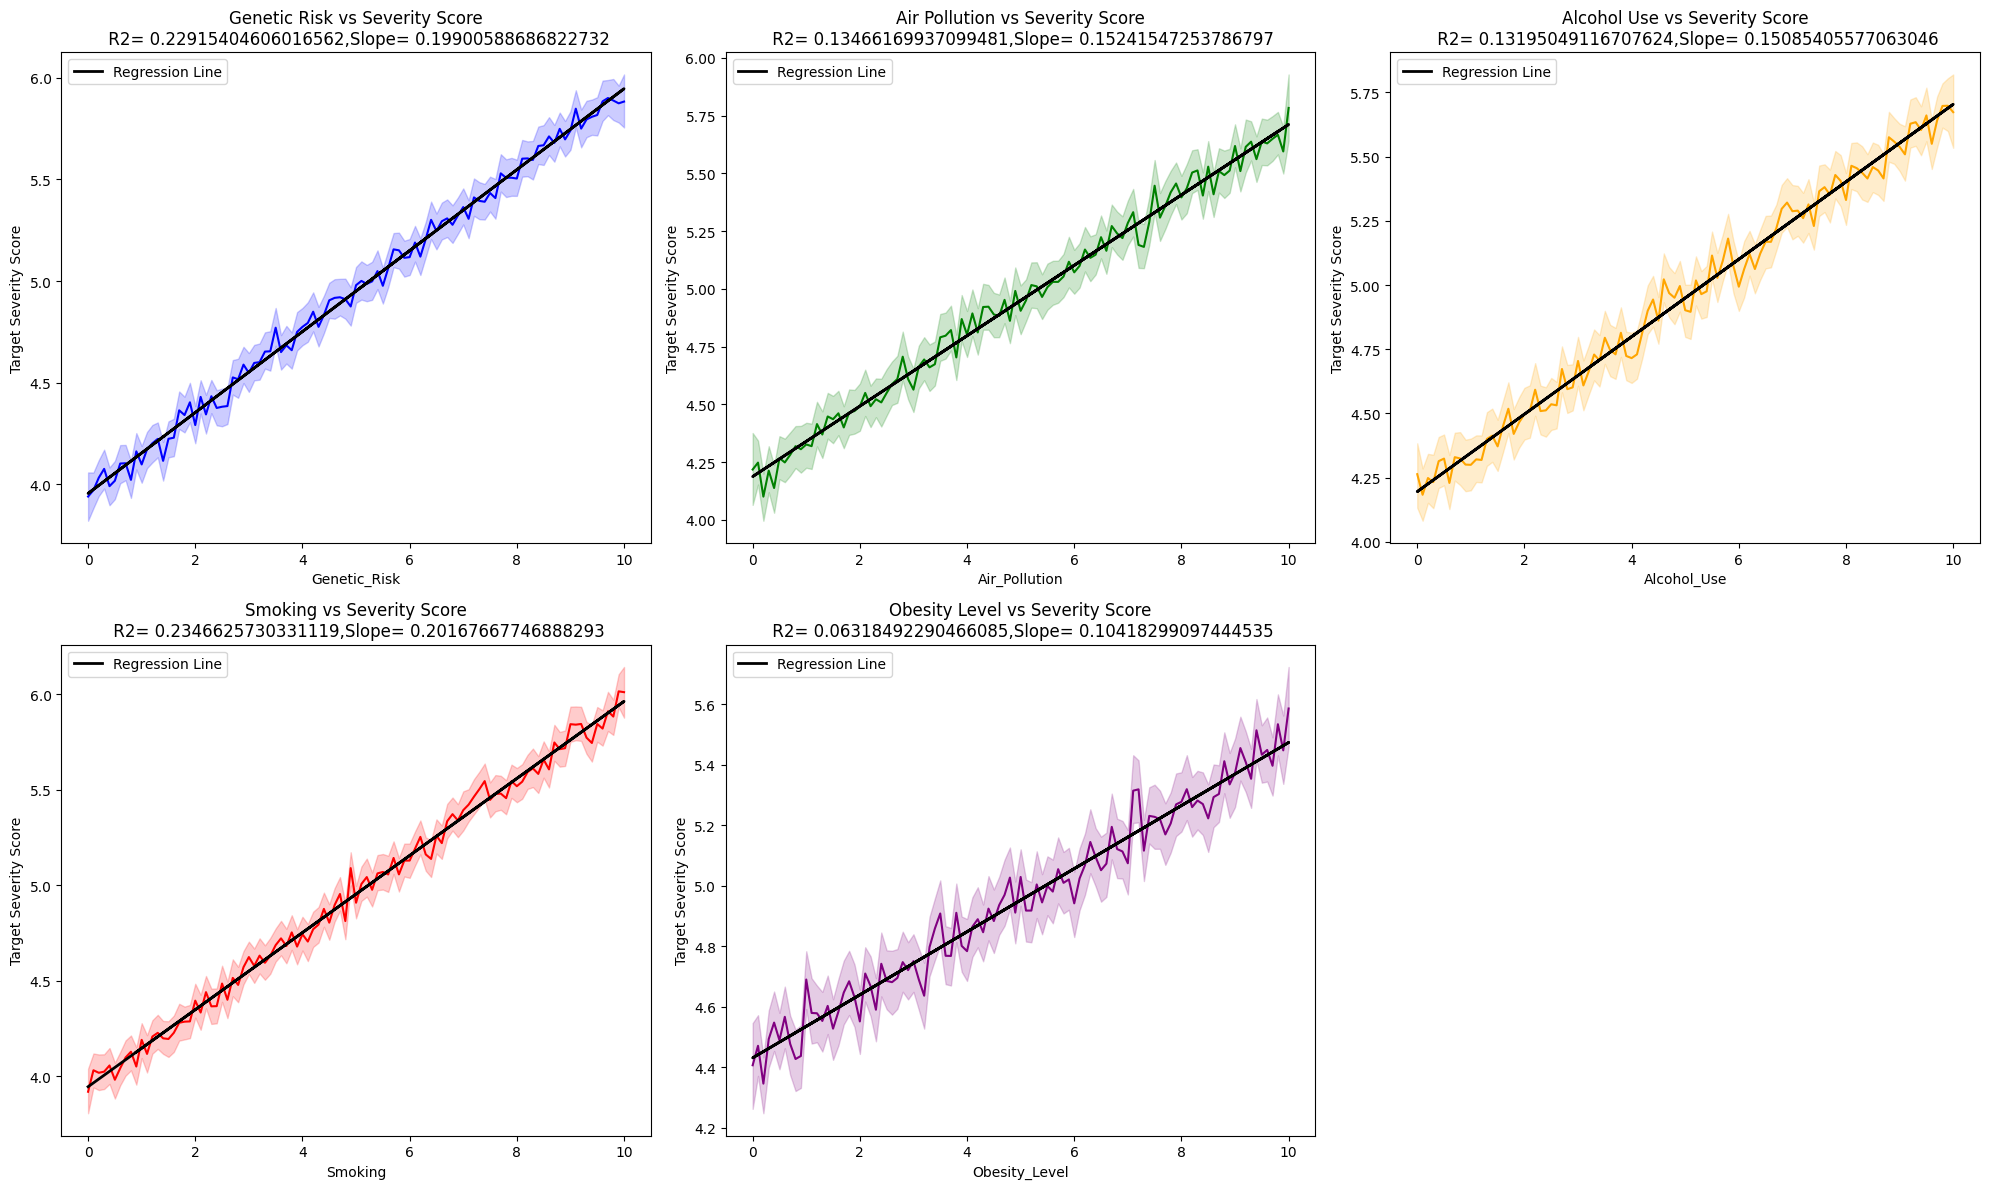

In [17]:
# Importing the linear regression function from scipy.stats.
from scipy.stats import linregress

# Defining the risk factor columns, corresponding titles for plots, and colors.
risk_factors= ['Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
titles= ['Genetic Risk','Air Pollution', 'Alcohol Use', 'Smoking', 'Obesity Level']
colors= ["blue", "green", "orange", "red", "purple"]

# Creating a figure with subplots to visualize the relationship between risk factors and severity score.
plt.figure(figsize=(20,12))
# Iterating through each risk factor, title, and color.
#convers the data values into tuple
for i , (factor , title,color) in enumerate(zip(risk_factors, titles, colors),1):
    plt.subplot(2,3,i)

    # Defining x and y variables for linear regression and plotting.
    x=data[factor]
    y=data["Target_Severity_Score"]
    # Performing linear regression.
    slope, intercept , r_value , p_value , std_err= linregress(x,y)
    # Calculating R-squared value.
    r_squared= r_value**2

    # Plotting the relationship between the risk factor and severity score using a line plot with confidence interval.
    sns.lineplot(x=factor, y="Target_Severity_Score", data=data, color=color)
    # Plotting the regression line.
    plt.plot(x,x*slope+intercept, color="black", linewidth=2, label="Regression Line")
    # Setting the title including R-squared and slope values.
    plt.title(f"{title} vs Severity Score\n R2= {r_squared},Slope= {slope}")
    # Setting labels for the axes.
    plt.xlabel(factor)
    plt.ylabel("Target Severity Score")
    # Displaying the legend.
    plt.legend()

#line= y=mx+c

# Adjusting layout to prevent overlapping titles and labels.
plt.tight_layout()
# Displaying the plots.
plt.show()

# Analyze the proportion of early-stage diagnoses by cancer type

In [18]:
# Getting the unique values in the 'Cancer_Type' column.
data["Cancer_Type"].unique()

array(['Lung', 'Leukemia', 'Breast', 'Colon', 'Skin', 'Cervical',
       'Prostate', 'Liver'], dtype=object)

In [19]:
# Counting the occurrences of each cancer stage for 'Lung' cancer.
stage_count= data[data["Cancer_Type"]=="Lung"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of lung cancer cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of lungs cancer  diagnosed  at stage 0 and Stag 1 : 38.43156356551388


In [20]:
# Counting the occurrences of each cancer stage for 'Leukemia' cancer.
stage_count= data[data["Cancer_Type"]=="Leukemia"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of leukemia cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Leukemia cancer  diagnosed  at stage 0 and Stag 1 : 39.53080114905841


In [21]:
# Counting the occurrences of each cancer stage for 'Breast' cancer.
stage_count= data[data["Cancer_Type"]=="Breast"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of breast cancer cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Breast cancer  diagnosed  at stage 0 and Stag 1 : 39.47325900791727


In [22]:
# Counting the occurrences of each cancer stage for 'Colon' cancer.
stage_count= data[data["Cancer_Type"]=="Colon"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of colon cancer cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41718946047679


In [23]:
# Counting the occurrences of each cancer stage for 'Skin' cancer.
stage_count= data[data["Cancer_Type"]=="Skin"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of skin cancer cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Colon cancer  diagnosed  at stage 0 and Stag 1 : 40.41084898090194


In [24]:
# Counting the occurrences of each cancer stage for 'Cervical' cancer.
stage_count= data[data["Cancer_Type"]=="Cervical"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of cervical cancer cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Cervical cancer  diagnosed  at stage 0 and Stag 1 : 39.85856637737062


In [25]:
# Counting the occurrences of each cancer stage for 'Prostate' cancer.
stage_count= data[data["Cancer_Type"]=="Prostate"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of prostate cancer cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Prostate cancer  diagnosed  at stage 0 and Stag 1 : 40.187064045656314


In [26]:
# Counting the occurrences of each cancer stage for 'Liver' cancer.
stage_count= data[data["Cancer_Type"]=="Liver"]["Cancer_Stage"].value_counts()
# Summing the counts for Stage 0 and Stage I to get the number of early-stage diagnoses.
early_stage_sum= stage_count.get("Stage 0",0)+stage_count.get("Stage I",0)
# Calculating the total number of liver cancer cases.
total_sum= stage_count.sum()
# Calculating the proportion of early-stage diagnoses.
proportion= (early_stage_sum/total_sum)*100
# Printing the calculated proportion.
print(f"proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : {proportion}")

proportion  of Liver cancer  diagnosed  at stage 0 and Stag 1 : 40.614498319731155


# Identify key predictors of cancer severity and survival years.

In [27]:
# Defining the features and target variables for correlation analysis.
features= ["Age", 'Genetic_Risk','Air_Pollution', 'Alcohol_Use', 'Smoking', 'Obesity_Level']
targets= ["Survival_Years","Target_Severity_Score"]

# Calculating Pearson correlation coefficients.
pearson_corr= data[features+targets].corr(method="pearson")
# Calculating Spearman correlation coefficients.
spearman_corr= data[features+targets].corr(method="spearman")

# Slicing out only the correlations with the target variables.
pearson_results= pearson_corr[targets]
spearman_results=spearman_corr[targets]

# Combining both Pearson and Spearman correlation results into a single DataFrame.
correlation_df= pd.concat([pearson_results,spearman_results], axis=1, keys=["Pearson","Spearman"])
# Displaying the combined correlation DataFrame.
correlation_df

Pearson                             Spearman  \
                      Survival_Years Target_Severity_Score Survival_Years   
Age                        -0.000147             -0.001481      -0.000149   
Genetic_Risk                0.001708              0.478700       0.001684   
Air_Pollution               0.000893              0.366963       0.000841   
Alcohol_Use                -0.000527              0.363250      -0.000543   
Smoking                     0.001371              0.484420       0.001372   
Obesity_Level               0.009771              0.251366       0.009780   
Survival_Years              1.000000              0.004161       1.000000   
Target_Severity_Score       0.004161              1.000000       0.003431   

                                             
                      Target_Severity_Score  
Age                               -0.002076  
Genetic_Risk                       0.472193  
Air_Pollution                      0.357528  
Alcohol_Use                        0.354694  
Smoking                            0.477881  
Obesity_Level                      0.243152  
Survival_Years                     0.003431  
Target_Severity_Score              1.000000

In [28]:
# Importing necessary libraries for Random Forest Regression.
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Identifying categorical columns to be encoded.
# caonveting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
# Encoding categorical columns using Label Encoding.
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=["Target_Severity_Score"]).copy()

# Preparing the features (X) and target variable (y_severity).
X= data_cleaned.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data_cleaned["Target_Severity_Score"]

# Splitting the data into training and testing sets.
# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

# Initializing and training a Random Forest Regressor model.
# train the model
model= RandomForestRegressor(n_estimators=200, max_depth= None , min_samples_split=2,min_samples_leaf=1, random_state=40)
model.fit(X_train_s, y_train_s)

# Evaluating the model performance using R-squared on training and testing sets.
# evalaute the model
train_r2_severity= r2_score(y_train_s , model.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , model.predict(X_test_s))

In [29]:
# Printing the R-squared scores for the training and testing sets for the severity model.
print(train_r2_severity)
print(test_r2_severity)

0.9689503792116058
0.7752278237418935


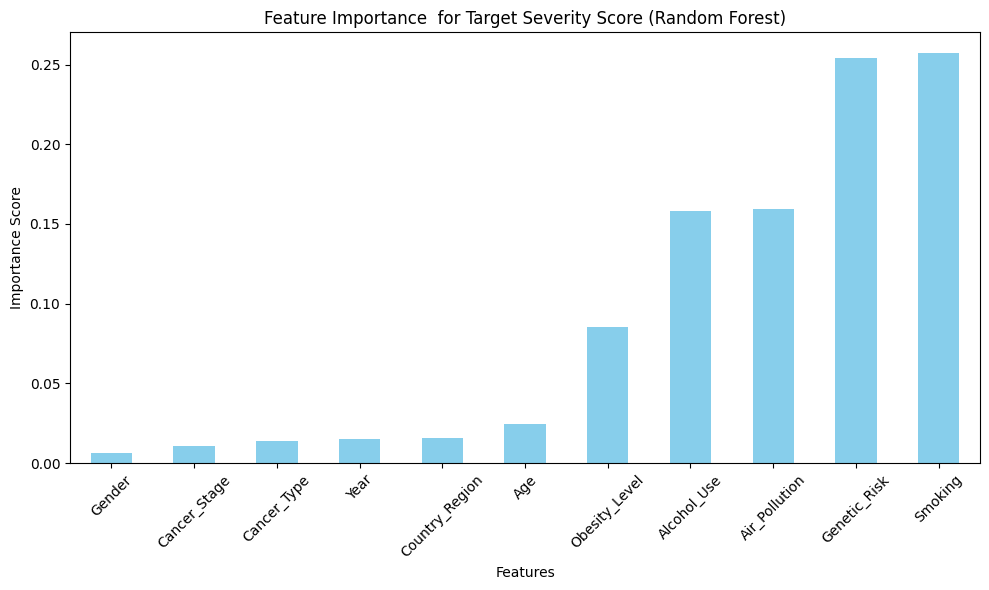

In [30]:
# Getting feature importances from the trained Random Forest model and sorting them.
feature_importance_severity= pd.Series(model.feature_importances_, index=X.columns,).sort_values(ascending=True)

# Plotting the feature importances.
#plotting of important features
plt.figure(figsize=(10,6))
feature_importance_severity.plot(kind="bar", color="skyblue")
# Setting the title and labels for the plot.
plt.title("Feature Importance  for Target Severity Score (Random Forest)")
plt.xlabel("Features")
plt.ylabel("Importance Score")
# Rotating x-axis labels for better readability.
plt.xticks(rotation= 45)
# Adjusting layout to prevent overlapping titles and labels.
plt.tight_layout()
# Displaying the plot.
plt.show()

In [31]:
# Importing necessary libraries for Random Forest Regression and hyperparameter tuning.
# random forest for target severity score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

# Identifying categorical columns to be encoded.
# caonverting categorical columns to numerical columns
categorical_cols= ["Gender","Country_Region","Cancer_Type","Cancer_Stage"]
# Encoding categorical columns using Label Encoding.
for col in categorical_cols:
    le= LabelEncoder()
    data[col]=le.fit_transform(data[col])

# Drop rows with missing values in the target variable
data_cleaned = data.dropna(subset=["Survival_Years"]).copy()

# Preparing the features (X) and target variable (y_severity - here it's Survival_Years).
X= data_cleaned.drop(columns=["Patient_ID","Survival_Years","Target_Severity_Score","Treatment_Cost_USD"])
y_severity= data_cleaned["Survival_Years"]

# Splitting the data into training and testing sets.
# train test split
X_train_s, X_test_s, y_train_s, y_test_s= train_test_split(X, y_severity, test_size=0.2, random_state=40)

# Defining the parameter grid for GridSearchCV.
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing Random Forest Regressor and GridSearchCV for hyperparameter tuning.
# train the model
model= RandomForestRegressor(random_state=40)
GSC= GridSearchCV(model , param_grid, cv=3, scoring="r2", n_jobs=-1)
# Fitting the GridSearchCV to the training data.
GSC.fit(X_train_s, y_train_s)

# Getting the best estimator from GridSearchCV.
best_rf_severity= GSC.best_estimator_

# Evaluating the best model's performance using R-squared on training and testing sets.
# evalaute the model
train_r2_severity= r2_score(y_train_s , best_rf_severity.predict(X_train_s))
test_r2_severity= r2_score(y_test_s , best_rf_severity.predict(X_test_s))

In [32]:
# Printing the R-squared scores for the training and testing sets for the survival years model.
print(train_r2_severity)
print(test_r2_severity)

0.008998065861791305
-0.0003487352301705382


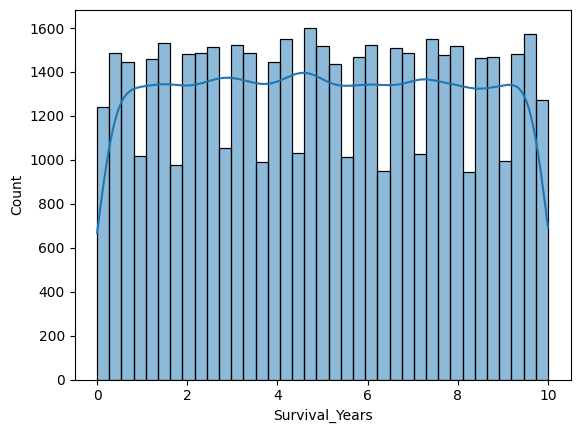

In [33]:
# Importing seaborn for visualization.
import seaborn as sns
# Creating a histogram with a KDE plot overlay for the 'Survival_Years' column.
sns.histplot(data["Survival_Years"], kde=True)
# Displaying the plot.
plt.show()

In [34]:
# Calculating the correlation of all numeric columns with 'Survival_Years' and sorting the values.
data.corr(numeric_only=True)["Survival_Years"].sort_values(ascending=True)

,Survival_Years
Gender,-0.007121
Cancer_Stage,-0.003014
Cancer_Type,-0.001717
Alcohol_Use,-0.000527
Treatment_Cost_USD,-0.000429
Age,-0.000147
Year,0.000018
Air_Pollution,0.000893
Smoking,0.001371
Genetic_Risk,0.001708


# Explore the economic burden of cancer treatment across different demographics and countries

In [35]:
# Loading the dataset again from a CSV file into a pandas DataFrame.
data = pd.read_csv("global_cancer_patients_2015_2024.csv")
# Displaying the first few rows of the DataFrame.
data

,Patient_ID,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Treatment_Cost_USD,Survival_Years,Target_Severity_Score
0,PT0000000,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,Stage III,62913.44,5.9,4.92
1,PT0000001,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,Stage 0,12573.41,4.7,4.65
2,PT0000002,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,Stage II,6984.33,7.1,5.84
3,PT0000003,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,Stage I,67446.25,1.6,3.12
4,PT0000004,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,Stage III,77977.12,2.9,3.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,PT0049995,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,Stage 0,71463.70,1.0,3.63
49996,PT0049996,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,Stage I,49619.66,0.4,6.03
49997,PT0049997,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,Stage 0,5338.25,2.7,6.02
49998,PT0049998,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,Stage IV,45100.47,7.5,6.54


In [36]:
# Creating age groups based on specified bins and adding a new column 'Age_Group' to the DataFrame.
data["Age_Group"]=pd.cut(data["Age"],bins=[0,30,45,60,75,100],labels=["0-30","31-45","46-60","61-75","76+"])

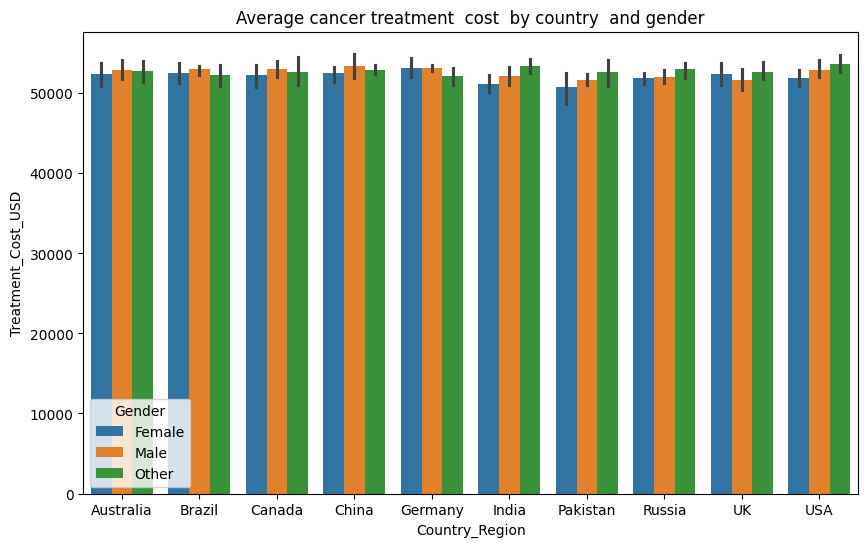

In [37]:
# Grouping the data by 'Country_Region', 'Age_Group', and 'Gender' and calculating the mean 'Treatment_Cost_USD'.
country_age_cost= data.groupby(["Country_Region", "Age_Group","Gender"])["Treatment_Cost_USD"].mean().reset_index()
# Creating a bar plot to visualize the average treatment cost by country and gender.
plt.figure(figsize=(10,6))
sns.barplot(data=country_age_cost,x="Country_Region", y="Treatment_Cost_USD", hue="Gender")
# Setting the title for the plot.
plt.title("Average cancer treatment  cost  by country  and gender")
# Displaying the plot.
plt.show()

In [38]:
# Grouping the data by 'Country_Region' and 'Age_Group' and calculating the mean 'Treatment_Cost_USD'.
country_age_cost= data.groupby(["Country_Region", "Age_Group"])["Treatment_Cost_USD"].mean().reset_index()

In [39]:
# Pivoting the grouped data to create a matrix suitable for a heatmap.
heatmap_data= country_age_cost.pivot(index="Age_Group", columns="Country_Region", values="Treatment_Cost_USD")

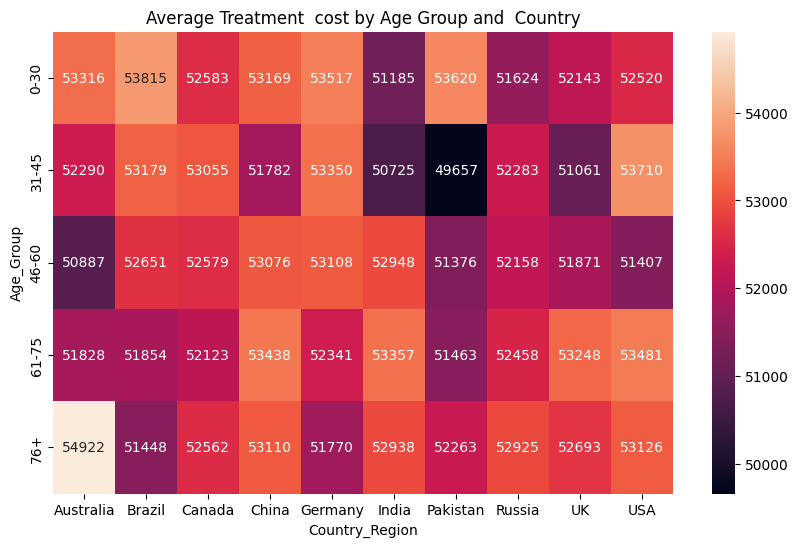

In [40]:
# Creating a heatmap to visualize the average treatment cost by age group and country.
plt.figure(figsize=(10,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f") # Displaying the values on the heatmap.
# Setting the title for the heatmap.
plt.title("Average Treatment  cost by Age Group and  Country")
# Displaying the heatmap.
plt.show()

# Assess whether higher treatment cost is associated with longer survival

In [41]:
# Importing necessary functions for correlation tests.
from scipy.stats  import pearsonr, spearmanr
# Defining the variables for the correlation test.
x= data["Treatment_Cost_USD"]
y=data["Survival_Years"]

# Performing Pearson correlation test.
pearson_corr, pearson_p = pearsonr(x,y)
# Printing the Pearson correlation coefficient and p-value.
print(f"Pearson Correlation Coefficient: {pearson_corr}")
print(f"Pearson P-Value : {pearson_p}")

# Performing Spearman correlation test.
spearman_corr, spearman_p = spearmanr(x,y)
# Printing the Spearman correlation coefficient and p-value.
print(f"spearman Correlation Coefficient: {spearman_corr}")
print(f"spearman P-Value : {spearman_p}")

# Defining the significance level.
alpha=0.05

# Function to interpret the correlation test results based on the p-value.
def interpret_corr(corr, p, method):
    if p<alpha:
        print(f"{method}, we  reject thr hull hypothesis") # Reject the null hypothesis if p-value is less than alpha.
    else:
        print(f"{method}, we failed to reject null hypothesis") # Fail to reject the null hypothesis if p-value is greater than or equal to alpha.

# Interpreting the results of both Pearson and Spearman correlation tests.
interpret_corr(pearson_corr,pearson_p,"Pearson")
interpret_corr(spearman_corr,spearman_p,"Spearman")

Pearson Correlation Coefficient: -0.0004294054283021506
Pearson P-Value : 0.9235082012963275
spearman Correlation Coefficient: -0.0004454737292549569
spearman P-Value : 0.9206551702014918
Pearson, we failed to reject null hypothesis
Spearman, we failed to reject null hypothesis


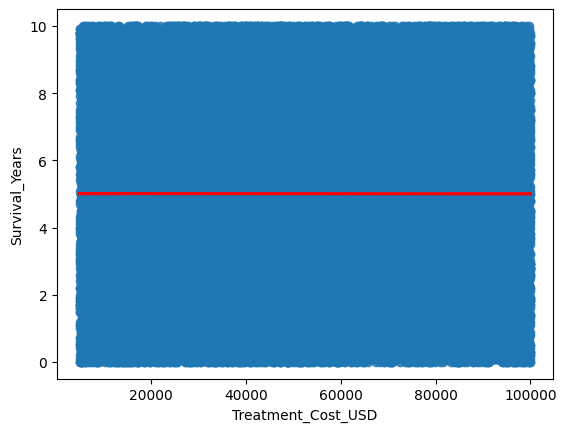

In [42]:
# Creating a regression plot to visualize the relationship between Treatment_Cost_USD and Survival_Years.
sns.regplot(x=x, y=y, line_kws={"color":"red"}) # Adding a red regression line.
# Displaying the plot.
plt.show()

# Evaluate if higher cancer stages lead to greater treatment costs and reduced survival years

In [43]:
# Creating a copy of the DataFrame.
df= data.copy()

In [44]:
# Defining the desired order of cancer stages.
stage_order = ['Stage 0', 'Stage I', 'Stage II', 'Stage III', 'Stage IV']

In [45]:
# Grouping the DataFrame by 'Cancer_Stage' and calculating the mean of 'Treatment_Cost_USD' and 'Survival_Years'.
grouped_stats= df.groupby("Cancer_Stage")[["Treatment_Cost_USD","Survival_Years"]].mean().reset_index()

In [46]:
# Displaying the grouped statistics DataFrame.
grouped_stats

,Cancer_Stage,Treatment_Cost_USD,Survival_Years
0,Stage 0,52572.589493,5.015199
1,Stage I,52674.079638,5.012990
2,Stage II,52082.841258,4.995170
3,Stage III,52708.197506,5.036311
4,Stage IV,52302.471041,4.972596


In [47]:
# Initializing lists to store treatment costs and survival years for each cancer stage.
grouped_costs=[]
grouped_survival=[]

# Iterating through each stage in the defined order.
for  stage in stage_order:
    # Filtering the DataFrame for the current stage.
    stage_data= df[df["Cancer_Stage"]==stage]
    # Extracting 'Treatment_Cost_USD' and 'Survival_Years' for the current stage.
    cost= stage_data["Treatment_Cost_USD"]
    survival= stage_data["Survival_Years"]
    # Appending the extracted data to the respective lists.
    grouped_costs.append(cost)
    grouped_survival.append(survival)

In [48]:
# Getting the number of groups (cancer stages) in the grouped_costs list.
len(grouped_costs)

5

In [49]:
# Importing necessary functions for normality test (Shapiro-Wilk) and ANOVA.
from scipy.stats import  shapiro, f_oneway
# Initializing counters for groups that are not normally distributed.
normal_cost=0
normal_survival=0

# Iterating through each grouped stage data.
for i in range (len(stage_order)):
    # Performing Shapiro-Wilk test for normality on treatment costs and survival years.
    cost_p= shapiro(grouped_costs[i]).pvalue
    surv_p= shapiro(grouped_survival[i]).pvalue
    # Printing the p-values for normality tests.
    print(f" cost {cost_p} for group {i}")
    print(f"Survival {surv_p} for group {i}")
    # Checking if the p-value is less than 0.05, indicating non-normality.
    if cost_p<0.05:
        normal_cost+=1
    if surv_p<0.05:
        normal_survival+=1

 cost 1.5471821061637387e-47 for group 0
Survival 1.6291039522109283e-47 for group 0
 cost 7.306523956950957e-48 for group 1
Survival 7.575551046259697e-48 for group 1
 cost 8.943579643043388e-48 for group 2
Survival 4.041659465829829e-48 for group 2
 cost 5.267270033022367e-48 for group 3
Survival 1.3648520457944784e-47 for group 3
 cost 1.5838640189581322e-47 for group 4
Survival 2.2992598289836786e-47 for group 4


In [50]:
# Printing the counts of groups that are not normally distributed for treatment cost and survival years.
print(normal_cost)
print(normal_survival)

5
5


In [51]:
# Importing the Kruskal-Wallis test function.
from scipy.stats import kruskal

In [52]:
# Performing the Kruskal-Wallis test on treatment costs across different cancer stages.
kusrkal_cost =kruskal(*grouped_costs)
# Performing the Kruskal-Wallis test on survival years across different cancer stages.
kurkal_survival= kruskal(*grouped_survival)

# Extracting the p-values from the Kruskal-Wallis tests.
p_cost= kusrkal_cost.pvalue
p_survival= kurkal_survival.pvalue

In [53]:
# Printing the p-value for the Kruskal-Wallis test on treatment costs.
p_cost

np.float64(0.4254451689062656)

In [54]:
# Printing the p-value for the Kruskal-Wallis test on survival years.
p_survival

np.float64(0.6033078729984223)

# Examine whether higher genetic risk amplifies the negative effects of smoking on cancer severity

Null Hypothesis (H₀):
The interaction effect between genetic risk and smoking on cancer Severity is not significant.
(Genetic risk does not amplify or alter the effect of smoking.)

Alternative Hypothesis (H₁):
The interaction effect between genetic risk and smoking on  cancer severity is significant.
(Genetic risk does amplify or alter the effect of smoking.)

In [55]:
# Importing the statsmodels formula API for OLS regression.
import statsmodels.formula.api as smf

# Fitting an OLS regression model to examine the interaction between Genetic_Risk and Smoking on Target_Severity_Score.
model = smf.ols("Target_Severity_Score ~ Genetic_Risk*Smoking", data=data).fit()

# Displaying the summary of the model and specifically the row for the interaction term.
model.summary2().tables[1].loc["Genetic_Risk:Smoking"]

,Genetic_Risk:Smoking
Coef.,-0.000228
Std.Err.,0.000471
t,-0.484187
P>|t|,0.628255
[0.025,-0.001150
0.975],0.000694


In [56]:
# Storing the p-value for the interaction term from the OLS regression.
p_value=0.628255

## Project Summary

This project analyzed the `global_cancer_patients_2015_2024.csv` dataset to explore various aspects related to cancer patients, including demographics, risk factors, cancer types and stages, treatment costs, and survival rates.

**Key Findings:**

*   The dataset contains information on 50,000 patients with no missing values or duplicates.
*   The age distribution of patients is relatively uniform across the 20-89 range.
*   The gender distribution is almost equal among Male, Female, and Other categories.
*   Patient distribution across countries is also relatively even.
*   The most common cancer types and stages are also relatively evenly distributed.
*   Descriptive analysis of risk factors (`Genetic_Risk`, `Air_Pollution`, `Alcohol_Use`, `Smoking`, `Obesity_Level`) shows their distributions.
*   Linear regression analysis revealed that `Genetic_Risk` and `Smoking` have the strongest positive linear relationship with `Target_Severity_Score`.
*   The proportion of early-stage diagnoses (Stage 0 and Stage I) varies slightly across different cancer types, generally around 40%.
*   Correlation analysis showed very weak linear relationships between the risk factors and `Survival_Years`, and between `Treatment_Cost_USD` and `Survival_Years`.
*   A Random Forest model for `Target_Severity_Score` showed that `Smoking` and `Genetic_Risk` are the most important features.
*   A Random Forest model for `Survival_Years` had a very low R-squared score, suggesting that the current features are not strong predictors of survival years.
*   Analysis of treatment costs across countries and age groups revealed that costs are relatively similar across these demographics in the dataset.
*   Statistical tests (Kruskal-Wallis) indicated no significant difference in treatment costs or survival years across different cancer stages in this dataset.
*   The interaction effect between `Genetic_Risk` and `Smoking` on `Target_Severity_Score` was not statistically significant.

**Further Analysis:**

*   Investigate other potential predictors for survival years, possibly including interactions between features or external data sources.
*   Explore non-linear relationships between features and target variables.
*   Perform more in-depth analysis of treatment costs considering other factors not included in the current dataset.